In [96]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_df, clinical_df, on = "Mouse ID", how = "outer")

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [97]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_avg_df = merge_df.groupby(["Drug", "Timepoint"]).agg({"Tumor Volume (mm3)" : "mean"})
tumor_avg_df.rename(columns = {"Tumor Volume (mm3)": "Mean Tumor Volume"}, inplace = True)

# Convert to DataFrame
tumor_avg_df = tumor_avg_df.reset_index()

# Preview DataFrame
tumor_avg_df.head()

,Drug,Timepoint,Mean Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [117]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = tumor_avg_df["Mean Tumor Volume"].std()
tumor_sem_df = pd.DataFrame({"Drug" : tumor_avg_df["Drug"], 
                          "Timepoint" : tumor_avg_df["Timepoint"],
                          "Mean Tumor Volume" : tumor_avg_df["Mean Tumor Volume"], 
                          "Tumor SEM" : tumor_sem})
tumor_sem_df = tumor_avg_df.reset_index()                                                            
# Preview DataFrame
tumor_sem_df.head(5)


,index,Drug,Timepoint,Mean Tumor Volume,Tumor SEM
0,0,Capomulin,0,45.000000,8.980674
1,1,Capomulin,5,44.266086,8.980674
2,2,Capomulin,10,43.084291,8.980674
3,3,Capomulin,15,42.064317,8.980674
4,4,Capomulin,20,40.716325,8.980674


In [122]:
# Minor Data Munging to Re-Format the Data Frames
rows = ["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
tumor_by_drug = tumor_avg_df.set_index("Drug").drop(rows)
tumor_by_drug = tumor_by_drug.pivot_table(tumor_by_drug, index = "Timepoint", columns="Drug")
tumor_by_drug = tumor_by_drug.reset_index()

# Preview that Reformatting worked
tumor_by_drug.head()

Timepoint Mean Tumor Volume                                  Tumor SEM  \
Drug                   Capomulin  Infubinol   Ketapril    Placebo Capomulin   
0            0         45.000000  45.000000  45.000000  45.000000  8.980674   
1            5         44.266086  47.062001  47.389175  47.125589  8.980674   
2           10         43.084291  49.403909  49.582269  49.423329  8.980674   
3           15         42.064317  51.296397  52.399974  51.359742  8.980674   
4           20         40.716325  53.197691  54.920935  54.364417  8.980674   

                                    
Drug Infubinol  Ketapril   Placebo  
0     8.980674  8.980674  8.980674  
1     8.980674  8.980674  8.980674  
2     8.980674  8.980674  8.980674  
3     8.980674  8.980674  8.980674  
4     8.980674  8.980674  8.980674

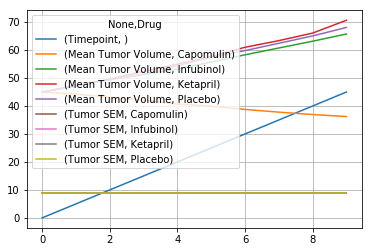

In [123]:
# Generate the Plot (with Error Bars)
drug_ax = tumor_by_drug.plot(kind="line", grid = True)

# drug_ax.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"])
# Save the Figure

In [101]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [102]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [103]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [104]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [105]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [106]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [107]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [108]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [109]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [110]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined